In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# function to draw a histogram given dataframe, featurre name and x axis title name
def plot_hist(df,feature,axis_name):
    fig,ax = plt.subplots(figsize=(6,5))
    plt.hist(df[feature],bins=50)
    plt.xlabel(axis_name)
    plt.show()

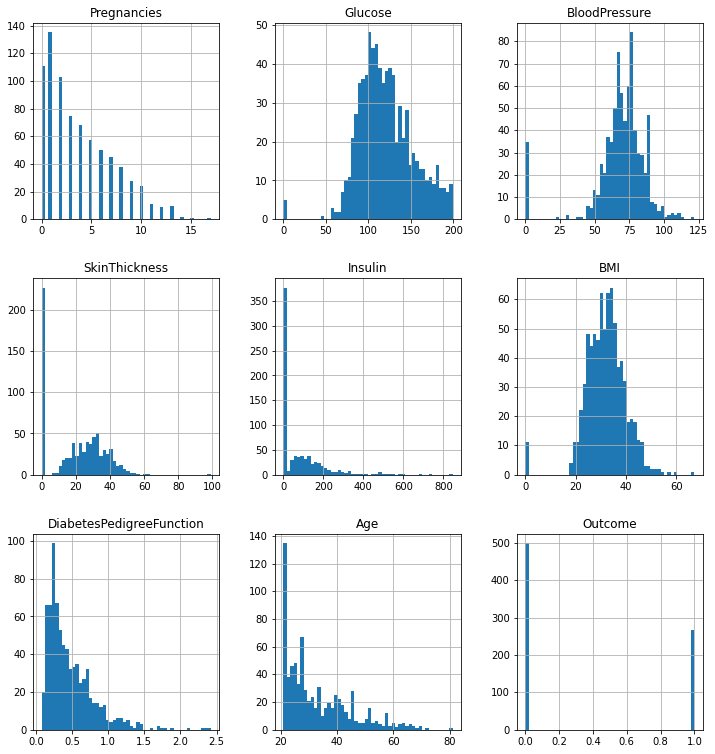

In [9]:
df.hist(figsize=(12,13),bins=50)
plt.show()    
    

In [10]:
# Stoppinig the ooutliers and missing values
# here enters coommon sense and domain knowledge
# frrmo the output of describe and above histograms, we need to carefully check if the distributions make sense

## in our data following variables can't have zero value:

* BMI
* Insulin
* Skin thickness
* Blood pressure
* Glucose

Any of these zero means a person is dead <br>
It means these are missing values <br>
Let's see how many missing values does each of these columns have


In [11]:
# making a list of columns with missing values
ms_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<10}")
for i in ms_col:
    print(f"{i: <15}{(df[i]==0).sum():<20}{(((df[i]==0).sum())*100)/df.shape[0]: .2f}")

feature name   Missing Values      % missing values
Glucose        5                    0.65
BloodPressure  35                   4.56
SkinThickness  227                  29.56
Insulin        374                  48.70
BMI            11                   1.43


## What to do with these missing values ?
For the features Insulin, Skin Thickness a big fraction of values is missing <br>
We can't just delete the rows with missing values


## Let's first plot the  distribution of outcome for each feature when the value is misssing,
we want to check if they are not biased for a particular outcome, especially for insulin and skin thicknesss 

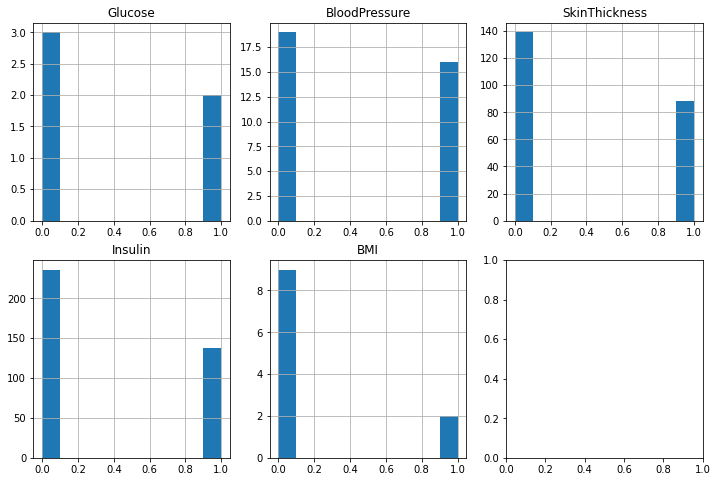

In [12]:
fig,ax = plt.subplots(2,3,figsize=(12,8))
ax = ax.ravel()
j =0
for i in ms_col:
    df[df[i]==0]['Outcome'].hist(ax=ax[j])
    ax[j].set_title(i)
    j=j+1

In both the cases, Skin thickness and insulin. The outcome 0 (no diabetes) has more missing data than outcome 1 (diabetess). In fact the pattern is consistent for all the feature variables with misssing values

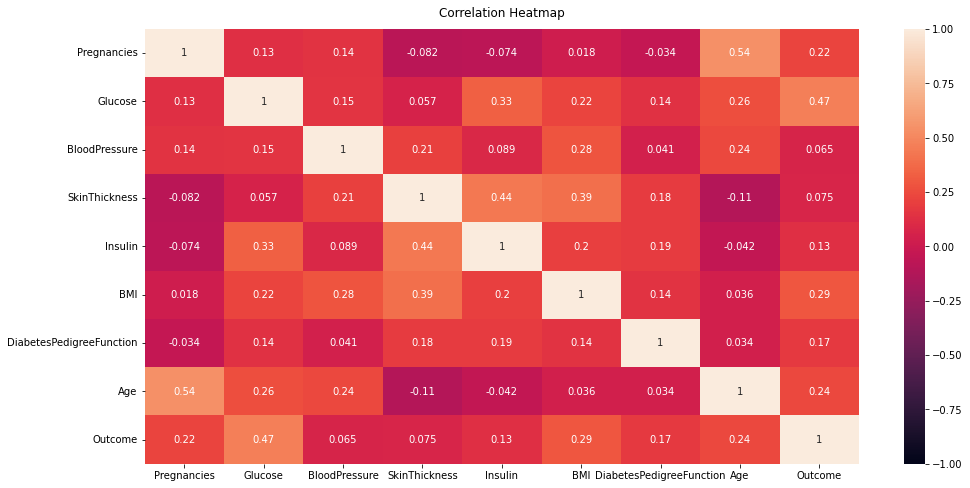

In [13]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

* Lets replace the missing values, we will replace the missing values with target value 0 with the median of dataset with target value 0
* we will replace the missing values with target value 1 with the median of dataset with target value 1
* Before replacing the missing values with median we replace the zeros with nan so that the median calculation doesn't consider zero


In [14]:
# to keep a copy of old df
dfold = df.copy()

In [15]:
for i in ms_col:
    df.loc[(df['Outcome']==0) & (df[i]==0), i] = df[(df['Outcome']==0) & (df[i]!=0)][i].median()
    df.loc[(df['Outcome']==1) & (df[i]==0), i] = df[(df['Outcome']==1) & (df[i]!=0)][i].median()

In [16]:
# checking if the missing values remain 
print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<10}")
for i in ms_col:
    print(f"{i: <15}{(df[i]==0).sum():<20}{(((df[i]==0).sum())*100)/df.shape[0]: .2f}")

feature name   Missing Values      % missing values
Glucose        0                    0.00
BloodPressure  0                    0.00
SkinThickness  0                    0.00
Insulin        0                    0.00
BMI            0                    0.00


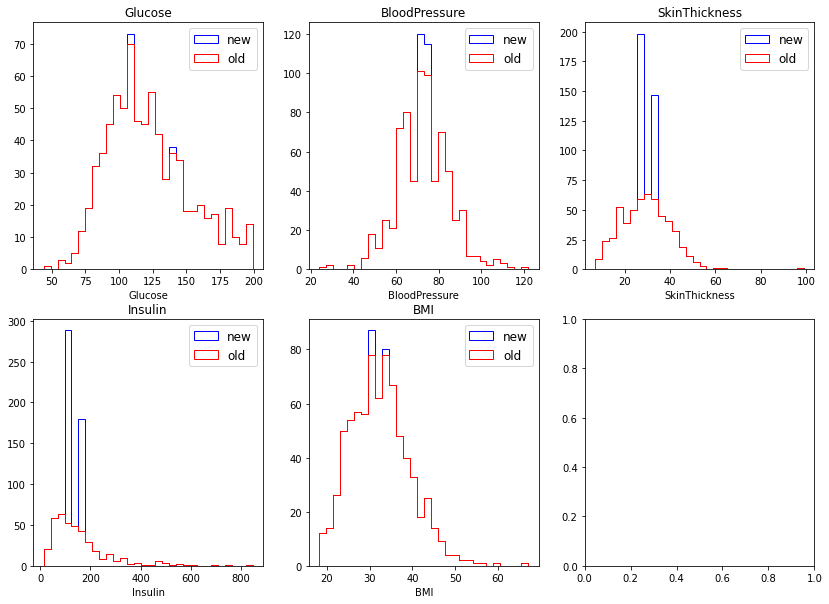

In [17]:
# Let's compare the distribution of each variable before and after replacing the missing values
# for distributions before we won't plot the zero bin
fig,ax = plt.subplots(2,3,figsize=(14,10))
a=0
ax = ax.ravel()
for i in range(5):
    ax[i].hist(df[ms_col[a]],label='new',bins=30,histtype='step',color='blue')
    ax[i].hist(dfold[dfold[ms_col[a]]!=0][ms_col[a]], label='old',bins=30,histtype='step',color='red')
    ax[i].set_xlabel(ms_col[a])
    ax[i].set_title(ms_col[a])
    ax[i].legend(fontsize='large')
    a=a+1    

In [18]:
#okay lets now ise k fold cross validation
# we will use k=5
from xgboost import XGBClassifier


In [19]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [20]:
#We will split our dataframe into feature matrix and target variable X , y respectively
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [21]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X=scaling_x.fit_transform(X)


In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = XGBClassifier(eval_metric='logloss')
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.87012987 0.87012987 0.8961039  0.83660131 0.90196078]
Accuracy: 87.50% (2.32%)


In [23]:
#lets do a simple train test split and check the accuracy
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, random_state=7,stratify=Y)
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

model1 = XGBClassifier(eval_metric='logloss')
model1.fit(X_train,Y_train)

print("Accuracy score from train set is ",model1.score(X_train, Y_train))
print("Accuracy score from test set is ",model1.score(X_test, Y_test))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score from train set is  1.0
Accuracy score from test set is  0.8896103896103896


In [24]:
#model1 = XGBClassifier(eval_metric='logloss')
#model1.fit(X_train,Y_train)

#print("Accuracy score from train set is ",model1.score(X_train, Y_train))
#print("Accuracy score from test set is ",model1.score(X_test, Y_test))

In [25]:
from xgboost import plot_importance


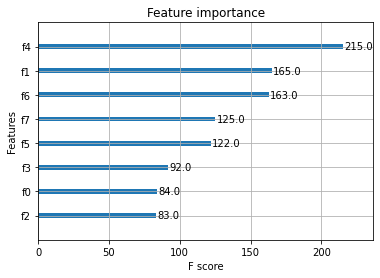

In [26]:
plot_importance(model1)
plt.show()


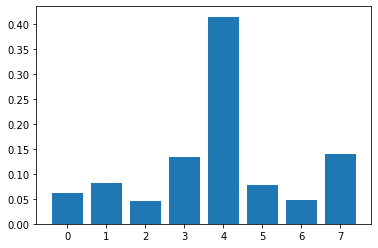

In [27]:
plt.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
plt.show()

In [28]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1


Let's try a different method ,
lets keep a test dataset completely separate out of the rows with no missing values

In [29]:
ms_col

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [30]:
dfold_miss  = dfold[(dfold['Glucose']==0) | (dfold['BloodPressure']==0) | (dfold['SkinThickness']==0)  | (dfold['Insulin']==0) | (dfold['BMI']==0)]
dfold_nmiss = dfold[(dfold['Glucose']!=0) & (dfold['BloodPressure']!=0) & (dfold['SkinThickness']!=0)  & (dfold['Insulin']!=0) & (dfold['BMI']!=0)]


In [31]:
##let's check if it worked
print(dfold_miss.shape[0])
print(dfold_nmiss.shape[0])
print(dfold.shape[0])

376
392
768


In [32]:
#function to check for missing values
def check_missing(df):
    print(f"{'feature name': <15}{'Missing Values':<20}{'% missing values':<10}")
    for i in ms_col:
        print(f"{i: <15}{(df[i]==0).sum():<20}{(((df[i]==0).sum())*100)/df.shape[0]: .2f}")

In [33]:
# let's do one more check 
check_missing(dfold_nmiss)

feature name   Missing Values      % missing values
Glucose        0                    0.00
BloodPressure  0                    0.00
SkinThickness  0                    0.00
Insulin        0                    0.00
BMI            0                    0.00


In [34]:
#checking in n missing dataset
check_missing(dfold_miss)

feature name   Missing Values      % missing values
Glucose        5                    1.33
BloodPressure  35                   9.31
SkinThickness  227                  60.37
Insulin        374                  99.47
BMI            11                   2.93


In [35]:
## let's separate the n missing dataset into feature matrix and target variable
Xnmiss=dfold_nmiss.drop('Outcome',axis=1)
Ynmiss=dfold_nmiss['Outcome']

In [36]:
Xnmiss

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59
...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26
755,1,128,88,39,110,36.5,1.057,37
760,2,88,58,26,16,28.4,0.766,22
763,10,101,76,48,180,32.9,0.171,63


In [37]:
Ynmiss

3      0
4      1
6      1
8      1
13     1
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 392, dtype: int64

In [38]:
## lets do a train_test_split for the non missing dataset

X_train_nmiss,X_test_nmiss,Y_train_nmiss,Y_test_nmiss =  train_test_split(Xnmiss,Ynmiss,test_size=0.20, random_state=7,stratify=Ynmiss)


In [39]:
X_train_nmiss

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
288,4,96,56,17,49,20.8,0.340,26
594,6,123,72,45,230,33.6,0.733,34
50,1,103,80,11,82,19.4,0.491,22
497,2,81,72,15,76,30.1,0.547,25
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
98,6,93,50,30,64,28.7,0.356,23
223,7,142,60,33,190,28.8,0.687,61
726,1,116,78,29,180,36.1,0.496,25


In [40]:
## lets merge the X_train_nmiss and Y_train_nmiss
df_train_nmiss = pd.concat([X_train_nmiss,Y_train_nmiss], axis=1)

In [41]:
df_train_nmiss.shape

(313, 9)

In [42]:
dfold_nmiss

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [43]:
df_train_nmiss

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
288,4,96,56,17,49,20.8,0.340,26,0
594,6,123,72,45,230,33.6,0.733,34,0
50,1,103,80,11,82,19.4,0.491,22,0
497,2,81,72,15,76,30.1,0.547,25,0
305,2,120,76,37,105,39.7,0.215,29,0
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
98,6,93,50,30,64,28.7,0.356,23,0
223,7,142,60,33,190,28.8,0.687,61,0
726,1,116,78,29,180,36.1,0.496,25,0


In [44]:
## lets concat the missing and n miss train dataframe
df_train_all = pd.concat([df_train_nmiss,dfold_miss], axis=0,ignore_index=False)

In [45]:
df_train_all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
288,4,96,56,17,49,20.8,0.340,26,0
594,6,123,72,45,230,33.6,0.733,34,0
50,1,103,80,11,82,19.4,0.491,22,0
497,2,81,72,15,76,30.1,0.547,25,0
305,2,120,76,37,105,39.7,0.215,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
#lets check the number of missing values in this dataset
check_missing(df_train_all)

feature name   Missing Values      % missing values
Glucose        5                    0.73
BloodPressure  35                   5.08
SkinThickness  227                  32.95
Insulin        374                  54.28
BMI            11                   1.60


In [47]:
## lets treat the missing values
for i in ms_col:
    df_train_all.loc[(df_train_all['Outcome']==0) & (df_train_all[i]==0), i] = df_train_all[(df_train_all['Outcome']==0) & (df_train_all[i]!=0)][i].median()
    df_train_all.loc[(df_train_all['Outcome']==1) & (df_train_all[i]==0), i] = df_train_all[(df_train_all['Outcome']==1) & (df_train_all[i]!=0)][i].median()

In [48]:
#lets check the missing 
check_missing(df_train_all)

feature name   Missing Values      % missing values
Glucose        0                    0.00
BloodPressure  0                    0.00
SkinThickness  0                    0.00
Insulin        0                    0.00
BMI            0                    0.00


In [49]:
# ! COOL

In [50]:
# Now lets apply the XGBoost with cross validation 5 fold 
Xt=df_train_all.drop('Outcome',axis=1)
Yt=df_train_all['Outcome']
scaling_xt=StandardScaler()
Xt=scaling_xt.fit_transform(Xt)


In [51]:
Xt.shape

(689, 8)

In [52]:
Yt.shape

(689,)

In [53]:

modelt = XGBClassifier(eval_metric='logloss')
kfoldt = KFold(n_splits=5, shuffle=True, random_state=42)
resultst = cross_val_score(modelt, Xt, Yt, cv=kfoldt)
print(resultst)
print("Accuracy: %.2f%% (%.2f%%)" % (resultst.mean()*100, resultst.std()*100))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0.89130435 0.89130435 0.87681159 0.89130435 0.88321168]
Accuracy: 88.68% (0.59%)


In [54]:
## lets do a final test now 
#Lets check the accuracy score on the test sample 
Xt_train,Xt_test,Yt_train,Yt_test = train_test_split(Xt,Yt,test_size=0.20, random_state=7,stratify=Yt)

model1f = XGBClassifier(eval_metric='logloss')
model1f.fit(Xt_train,Yt_train)

print("Accuracy score from train set is ",model1f.score(Xt_train, Yt_train))
print("Accuracy score from test set is ",model1f.score(Xt_test, Yt_test))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy score from train set is  1.0
Accuracy score from test set is  0.855072463768116


In [55]:
# let's test it on the left out test sample
model1f.score(X_test_nmiss, Y_test_nmiss)

0.3291139240506329

In [56]:
model1.score(X_test_nmiss, Y_test_nmiss)

0.3291139240506329

In [57]:
test_final = pd.concat([X_test_nmiss,Y_test_nmiss],axis=1)

In [58]:
test_final.shape

(79, 9)

<AxesSubplot:>

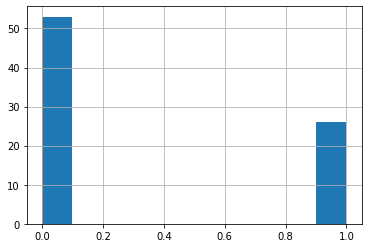

In [59]:
test_final['Outcome'].hist()

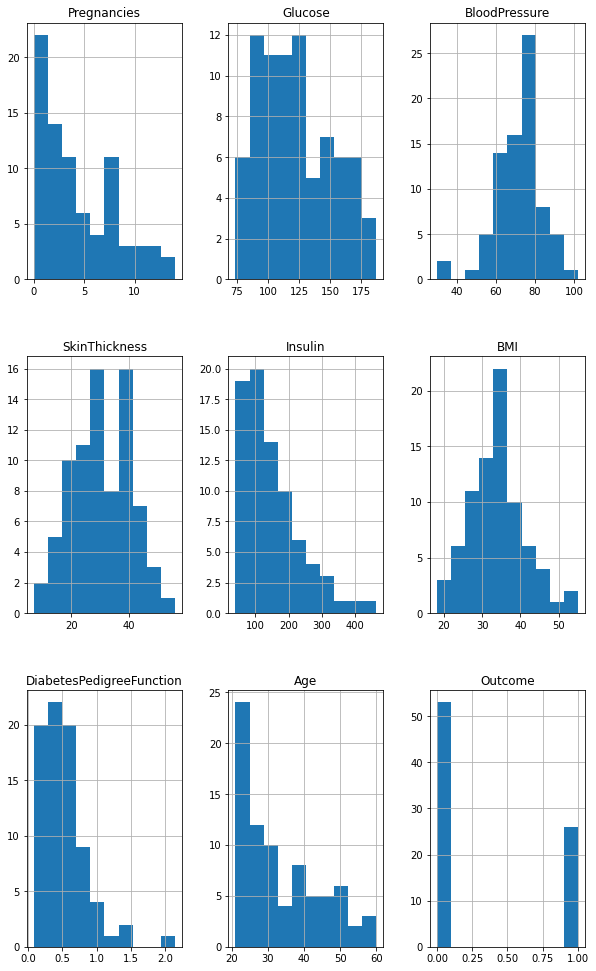

In [60]:
test_final.hist(figsize=(10,17))
plt.show()